<a href="https://colab.research.google.com/github/princekingsleysunday/DDL-upload/blob/master/CNN_VGGnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## VGGNet MNIST classification

# import the libraries
from keras.datasets.mnist import load_data
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
from tensorflow.python.framework import ops

## Using VGGNet Algorithm

VGG is a Convolutional Neural Network architecture, It was proposed by Karen Simonyan and Andrew Zisserman of Oxford Robotics Institute in the paper Very Deep Convolutional Networks for Large-Scale Image Recognition.
It was submitted to Large Scale Visual Recognition Challenge 2014 and The model achieves 92.7% top-5 test accuracy in ImageNet.
ImageNet is one the on the largest data-set available. It has 14 million hand-annotated images belonging to 1000 classes.


The main concept is stacking of convolutional layers to create a deep neural network.
VGG shows that the depth of the network has an important role. Deeper networks give better results.
One drawback of VGGNet is that this network is usually big. It contains around 160M parameters. Most of the parameters are consumed in the fully connected layers.

In [ ]:
# load the data - it returns 2 tuples of digits & labels - one for
# the train set & the other for the test set
(train_digits, train_labels), (test_digits, test_labels) = load_data()
#  some variables...
image_height = train_digits.shape[1]  
image_width = train_digits.shape[2]
num_channels = 1  # we have grayscale images
# NOTE: image_height == image_width == 28
# re-shape the images data
train_data = np.reshape(train_digits, (train_digits.shape[0], image_height, image_width, num_channels))
test_data = np.reshape(test_digits, (test_digits.shape[0],image_height, image_width, num_channels))

# re-scale the image data to values between [0,1]
train_data = train_data.astype('float32') / 255.
test_data = test_data.astype('float32') / 255.

# one-hot encode the labels - we have 10 output classes

# so 3 -> [0 0 0 1 0 0 0 0 0 0], 5 -> [0 0 0 0 0 1 0 0 0 0] & so on
num_classes = 10
train_labels_cat = to_categorical(train_labels,num_classes)
test_labels_cat = to_categorical(test_labels,num_classes)

# split training set into training and validation
train_data2, val_data,train_labels_cat2,  val_labels = train_test_split(train_data, train_labels_cat, test_size=0.1)

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print('X_train shape', X_train.shape, 'X_test shape', X_test.shape)

X_train shape (60000, 28, 28) X_test shape (10000, 28, 28)


In [ ]:
# Data Preprocessing

from keras.utils import to_categorical
def preprocess_data(X_train, y_train, X_test, y_test):
  # reshape images to the required size of Keras
  X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
  X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
  
  # convert image values from integers to floats
  X_train = X_train.astype('float32')
  X_test = X_test.astype('float32')
  
  # normalization
  X_train = X_train/255.0
  X_test_norm = X_test/255.0
  
  # One-hot encoding label 
  y_train = to_categorical(y_train)
  y_test = to_categorical(y_test)
  
  return X_train, y_train, X_test, y_test

In [ ]:
##VGGNet model

from keras.layers import BatchNormalization
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Flatten, Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
import os


model = Sequential()

model.add(Conv2D(32, 3, activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(Conv2D(64, 3, activation='relu', padding='same'))
model.add(MaxPooling2D(2, 2))
model.add(BatchNormalization())

model.add(Conv2D(128, 3, activation='relu', padding='same'))
model.add(Conv2D(128, 3, activation='relu', padding='same'))
model.add(MaxPooling2D(2, 2))
model.add(BatchNormalization())

model.add(Conv2D(256, 3, activation='relu', padding='same'))
model.add(Conv2D(256, 3, activation='relu', padding='same'))
model.add(Conv2D(256, 3, activation='relu', padding='same'))
model.add(MaxPooling2D(2, 2))
model.add(BatchNormalization())

model.add(Conv2D(512, 3, activation='relu', padding='same'))
model.add(Conv2D(512, 3, activation='relu', padding='same'))
model.add(Conv2D(512, 3, activation='relu', padding='same'))
model.add(MaxPooling2D(2, 1)) # default stride is 2
model.add(BatchNormalization())

model.add(Conv2D(512, 3, activation='relu', padding='same'))
model.add(Conv2D(512, 3, activation='relu', padding='same'))
model.add(Conv2D(512, 3, activation='relu', padding='same'))
model.add(MaxPooling2D(2, 1)) # default stride is 2
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

Epoch 1/50
468/468 [==============================] - 38s 60ms/step - loss: 0.2119 - accuracy: 0.9397 - val_loss: 457.4115 - val_accuracy: 0.1495
Epoch 2/50
468/468 [==============================] - 28s 58ms/step - loss: 0.0392 - accuracy: 0.9887 - val_loss: 1091.1201 - val_accuracy: 0.1514
Epoch 3/50
468/468 [==============================] - 28s 59ms/step - loss: 0.0214 - accuracy: 0.9943 - val_loss: 1322.0701 - val_accuracy: 0.1839
Epoch 4/50
468/468 [==============================] - 28s 60ms/step - loss: 0.0118 - accuracy: 0.9970 - val_loss: 937.5428 - val_accuracy: 0.2903
Epoch 5/50
468/468 [==============================] - 29s 61ms/step - loss: 0.0078 - accuracy: 0.9982 - val_loss: 1034.6271 - val_accuracy: 0.1699
Epoch 6/50
468/468 [==============================] - 28s 60ms/step - loss: 0.0044 - accuracy: 0.9992 - val_loss: 880.2313 - val_accuracy: 0.3232
Epoch 7/50
468/468 [==============================] - 28s 60ms/step - loss: 0.0026 - accuracy: 0.9996 - val_loss: 886.275

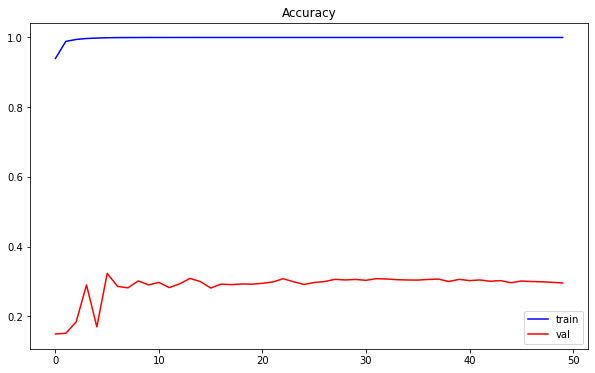

it took 1467.2374544143677 to train using the VGGnet model


In [ ]:
def summary_history(history):
  plt.figure(figsize = (10,6))
  plt.plot(history.history['accuracy'], color = 'blue', label = 'train')
  plt.plot(history.history['val_accuracy'], color = 'red', label = 'val')
  plt.legend()
  plt.title('Accuracy')
  plt.show()


def train_model(model, X_train, y_train, X_test, y_test, epochs = 50, batch_size = 128):
  # Rescaling all training and testing data
  X_train, y_train, X_test, y_test = preprocess_data(X_train, y_train, X_test, y_test)
  # Fitting the model on the training set
  history = model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, 
                      steps_per_epoch = X_train.shape[0]//batch_size, 
                      validation_data = (X_test, y_test), 
                      validation_steps = X_test.shape[0]//batch_size, verbose = 1)
  # evaluating the model
  _, acc = model.evaluate(X_test, y_test, verbose = 1)
  print('%.3f' % (acc * 100.0))
  summary_history(history)

# import the builtin time module
import time

# Grab Currrent Time Before Running the Code
start = time.time()

train_model(model,X_train, y_train, X_test, y_test)

# Grab Currrent Time After Running the Code
end = time.time()

#Subtract Start Time from The End Time
total_time = end - start
print(f'it took {total_time} to train using the VGGnet model')

## Summary

Accuracy on test data : 29.59

It took 1467.23 sec to train the MNIST data using the VGGnet architecture